# EDA (Análisis Exploratorio de Datos)

##### En este proceso de análisis, tiene como objetivo hallar valores faltantes, valores atípicos u outliers y registros duplicados. Así mismo, se implementarán gráficos para analizar patrones, tendencias y correlaciones entre los datos

#### Importo librearias necesarias para el análisis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#### Lectura de datos

In [5]:
hechos = pd.read_csv('Datasets/CSV/hechos.csv')
victimas = pd.read_csv('Datasets/CSV/victimas.csv')

#### Primera vista de los datos

In [6]:
hechos.head()

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,otra_direccion,geocodificacion_CABA,longitud,latitud,moto,auto,transporte_publico,camion,ciclista,gravedad
0,2016-0001,1,2016-01-01 00:00:00,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-0002,1,2016-01-02 00:00:00,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-0003,1,2016-01-03 00:00:00,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-0004,1,2016-01-10 00:00:00,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-0005,1,2016-01-21 00:00:00,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
victimas.head()

,id,fecha,aaaa,mm,dd,rol,victima,sexo,edad,fecha_fallecimiento,id hecho,aaa,fecha,vehiculo_victima,edad_victima,gravedad
0,2016-0001,2016-01-01,2016.0,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-0002,2016-01-02,2016.0,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-0003,2016-01-03,2016.0,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-0004,2016-01-10,2016.0,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-0005,2016-01-21,2016.0,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


#### Tipo de datos por columna

In [8]:
print('Tipo de dato:')
hechos.dtypes

Tipo de dato:


id                        object
n_victimas                 int64
fecha                     object
aaaa                       int64
mm                         int64
dd                         int64
hora                      object
hh                        object
lugar_del_hecho           object
tipo_de_calle             object
calle                     object
altura                   float64
cruce                     object
dirección normalizada     object
comuna                    object
xy (caba)                 object
pos x                     object
pos y                     object
participantes             object
victima                   object
acusado                   object
direccion_normalizada     object
tipo_calle                object
otra_direccion            object
geocodificacion_CABA      object
longitud                  object
latitud                   object
moto                      object
auto                      object
transporte_publico        object
camion    

In [9]:
print('Tipo de dato:')
victimas.dtypes

Tipo de dato:


id                      object
fecha                   object
aaaa                   float64
mm                       int64
dd                       int64
rol                     object
victima                 object
sexo                    object
edad                    object
fecha_fallecimiento     object
id hecho                object
aaa                    float64
fecha                   object
vehiculo_victima        object
edad_victima            object
gravedad                object
dtype: object

#### Valores duplicados

In [10]:
# Verifico con el ID ya que el resto de información podemos encontrar algun valor igual a otro y no necesariamente sea un duplicado, y el ID debe ser único

dups_hechos = hechos.duplicated().sum()
print("Cantidad de duplicados en 'hechos' :", dups_hechos)

dups_victimas = victimas.duplicated().sum()
print("Cantidad de duplicados en 'victimas' :", dups_victimas)

Cantidad de duplicados en 'hechos' : 0
Cantidad de duplicados en 'victimas' : 622


##### Se observa que el dataframe 'victimas' contiene 622 filas duplicadas, sin embargo debemos analisar si se tratan de datos idénticos o si son datos con características similares que estan involucrados en los accidentes de tránsito. Para realizar esta determinacion, tomaremos un 'id' asociado a los duplicados para su revisión a detelle

In [11]:
# Selecciono un id que esté duplicado para su verificación

id_hecho = 'LC-2019-0014644'
duplicados = victimas[victimas['id hecho'] == id_hecho]

print(f"Filas duplicads en en 'victimas' para el id '{id_hecho}' :")
duplicados

Filas duplicads en en 'victimas' para el id 'LC-2019-0014644' :


,id,fecha,aaaa,mm,dd,rol,victima,sexo,edad,fecha_fallecimiento,id hecho,aaa,fecha,vehiculo_victima,edad_victima,gravedad
912,NaN,NaN,NaN,1,8,NaN,NaN,Varon,NaN,NaN,LC-2019-0014644,2019.0,2019-01-08,sd,29,SD
913,NaN,NaN,NaN,1,8,NaN,NaN,Varon,NaN,NaN,LC-2019-0014644,2019.0,2019-01-08,sd,29,SD


In [12]:
hechos[hechos['id'] == 'LC-2019-0014644']

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,otra_direccion,geocodificacion_CABA,longitud,latitud,moto,auto,transporte_publico,camion,ciclista,gravedad
860,LC-2019-0014644,2,2019-01-08 00:00:00,2019,1,8,08:30:00,8,NaN,NaN,...,"Honduras y Scalabrini Ortiz, Raul Av. 0, Barri...",Point (103431.56807860361004714 104186.0149565...,-58.425894,-34.59153,SD,SD,SD,SD,SD,SD


##### Al realizar el cruce de datos entre 'victimas' y 'hechos', la columna 'n_victimas' nos indica que hay 2 victimas involucradas. Esto quiere decir que estas 2 victimas son aquellas que comparten el mismo identificador, ya que estuvieron involucrados en el mismo accidente, por lo que no son datos duplicados

#### Valores 'SD' ó sin dato 

##### En ambos datasets encontramos una cantidad considerable de datos 'SD', que significa sin dato, y el hecho de que se tomen la tarea de poblar el datasets con ese valor nos da un indicio de que a lo mejor en ese momento del accidente no había ese tipo de información a la mano, no se le puede atribuir a una pérdida de información

#### Análisis descriptivo

In [13]:
hechos[['n_victimas','aaaa','mm']].describe()

,n_victimas,aaaa,mm
count,24481.000000,24481.000000,24481.000000
mean,1.156856,2019.852620,6.600261
std,0.544944,0.937644,3.479634
min,0.000000,2016.000000,1.000000
25%,1.000000,2019.000000,3.000000
50%,1.000000,2020.000000,7.000000
75%,1.000000,2021.000000,10.000000
max,16.000000,2021.000000,12.000000


##### Se puede observar que para la columna 'n_victimas' que contiene un total de 24.481 registros, hay un promedio de 1.16 victimas por accidente de tránsito, ademas de una desviación estándar de 0.54, lo que indica una dispersión moderada de los datos. Así mismo, es posible identificar que el rango de victimas va desde 0 hasta 16 como su máximo, donde el 75% de los accidentes, resportan 1 victima

##### Para el caso de la columna de año 'aaaa' y mes 'mm', es de resaltar que obtenemos una desviación estándar más alta en comparación a las victimas, esto se se debe a que tenemos un rango variado de años y meses donde ocurrieron accidentes y por lo tanto no es una métrica que esté descalificando la calidad de los datos, adicional a esto, se destaca que el 75% de los accidentes de tránsito ocurrieron en el año 2021 y en el mes 10, datos para investigar y añadir valor a nuestro análisis posterior.

In [14]:
valores = hechos['comuna'].value_counts()
valores

comuna
1                  2616
15                 1952
4                  1805
3                  1763
9                  1747
14                 1616
7                  1576
12                 1477
11                 1443
13                 1395
10                 1376
5                  1248
8                  1127
6                   978
2                   903
SD                  846
No Especificada     442
0                     2
Name: count, dtype: int64

##### Es de resaltar que cuando se mira a detalle los valores de la columna 'comuna', hallamos valores de '0', y la comuna '0' no existe para la ciudad de Buenos Aires, por lo que es posible que se deba a una mala ingesta de la información

In [15]:
victimas.describe()

,aaaa,mm,dd,aaa
count,717.000000,28322.000000,28322.000000,27605.000000
mean,2018.174338,6.619907,15.629334,2019.897265
std,1.672655,3.481708,8.684060,0.860899
min,2016.000000,1.000000,1.000000,2019.000000
25%,2017.000000,3.000000,8.000000,2019.000000
50%,2018.000000,7.000000,16.000000,2020.000000
75%,2019.000000,10.000000,23.000000,2021.000000
max,2021.000000,12.000000,31.000000,2021.000000


##### En el caso del dataframe 'victimas', es de destacar que en la columna año 'aaaa' atribuida al año donde hubo victimas en accidentes fatales, se reportan 717 datos, donde el 75% de los las victimas fueron en el año 2019. Del mismo modo, el 75% de las victimas fueron en el mes 10 y el día 23 respectivamente. La última columna que tambien corresponde a año 'aaa', se refiere al año donde hubieron solamente lesionados en un accidente de tránsito, allí se observa que el 75% de los lesionados estan en el año 2021.

#### Detección de outliers

##### Implemento el método de los 3 sigmas, el cual me permite a traves de medidas como la media y la desviación estándar, conocer los límites empíricos de la distribución de nuestros datos, conocidos estos límites, todo lo que esté por fuera de ellos, es considerado un outlier

In [16]:
# Realizo un df donde me quedo sólo con los valores enteros de las edades para los homicidios, ignorando aquellos valores 'SD' y así poder hacer uso del método

df_hom  = victimas['edad'] = pd.to_numeric(victimas['edad'],errors='coerce')

df_hom = df_hom[~pd.isna(df_hom)]

df_hom.value_counts()



edad
30.0    28
29.0    24
23.0    24
28.0    20
27.0    20
        ..
11.0     1
13.0     1
85.0     1
7.0      1
88.0     1
Name: count, Length: 85, dtype: int64

In [17]:
# Realizo lo mismo para las edades de las victimas por lesiones

df_les = victimas['edad_victima'] = pd.to_numeric(victimas['edad_victima'], errors='coerce')

df_les = df_les[~pd.isna(df_les)]

df_les.value_counts()

edad_victima
28.0     812
29.0     805
27.0     776
30.0     765
26.0     761
        ... 
0.0        2
95.0       2
96.0       1
97.0       1
100.0      1
Name: count, Length: 99, dtype: int64

In [18]:
# Obtengo la media y la desviación estándar de la columna 'edad'
media = df_hom.mean()
desviacion_estandar = df_hom.std()

# Calculo los límites de los outliers
limite_inferior = media - 3 * desviacion_estandar
limite_superior = media + 3 * desviacion_estandar

# Identifico los outliers
outliers = df_hom.loc[(df_hom < limite_inferior) | (df_hom > limite_superior)]


print("Outliers para 'edad': ")
print(outliers)

Outliers para 'edad': 
Series([], Name: edad, dtype: float64)


##### Esta respuesta me permite saber que para las edades de victimas que fueron homicidios, no se encuentra ningún outlier

In [19]:
# Obtengo la media y la desviación estándar de la columna 'edad_victima'
media = df_les.mean()
desviacion_estandar = df_les.std()

# Calculo los límites de los outliers
limite_inferior = media - 3 * desviacion_estandar
limite_superior = media + 3 * desviacion_estandar

# Identifico los outliers
outliers = df_les.loc[(df_les < limite_inferior) | (df_les > limite_superior)]


print("Outliers para 'edad_victima': ")
print(outliers)

Outliers para 'edad_victima': 
787      84.0
1228     85.0
1275     90.0
1681     85.0
1718     85.0
         ... 
27640    85.0
27725    84.0
27954    90.0
28275    90.0
28317    87.0
Name: edad_victima, Length: 150, dtype: float64


##### En este caso, para las edades que corresponden a victimas por lesiones, se encuentran 150 outliers, esto no significa que sean valores que se deban borrar, en este caso en particular, corresponde a edades avanzadas de personas que se vieron involucradas en accidentes de tránsito

#### Análisis con gráficos

#### Gráfico de caja y bigotes, con este gráfico podemos representar gráficamente la distribución de datos numéricos, ademas de poder visualizar la mediana (línea naranja) y los valores outliers como lo hicimos con el método de las 3 sigmas.

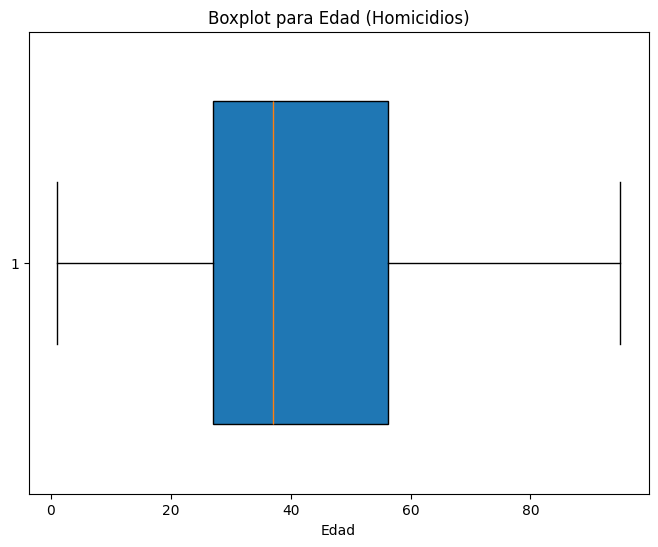

In [20]:
plt.figure(figsize=(8,6))
plt.boxplot(df_hom, vert=False, widths=0.7, patch_artist=True)

plt.xlabel('Edad')
plt.title('Boxplot para Edad (Homicidios)')

plt.show()

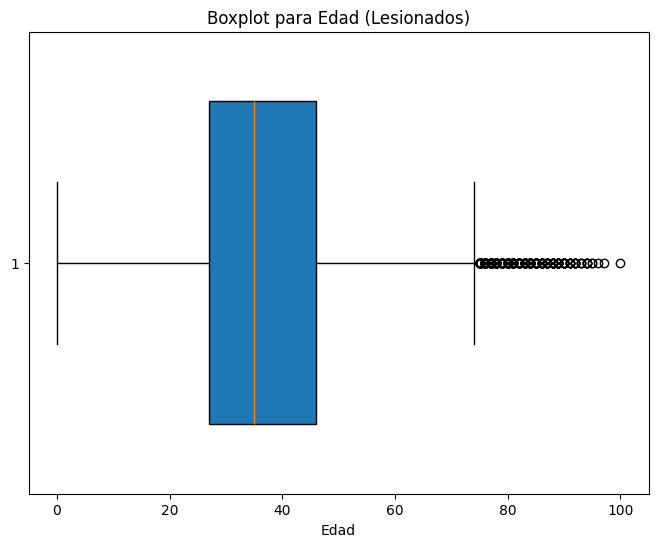

In [21]:
plt.figure(figsize=(8,6))
plt.boxplot(df_les, vert=False, widths=0.7, patch_artist=True)

plt.xlabel('Edad')
plt.title('Boxplot para Edad (Lesionados)')

plt.show()

##### Se confirma entonces el resultado obtenido en el proceso de las 3 sigmas, donde observamos que solo existen valores outliers para las edades asociadas a las victimas por lesiones en accidentes, adicional a esto, podemos observar que las mediadas de ambos son similares.

#### Gráfico de barras, nos permite representar la frecuencia que ocurre una variable y ademas visualizar la distribución de datos categóricos

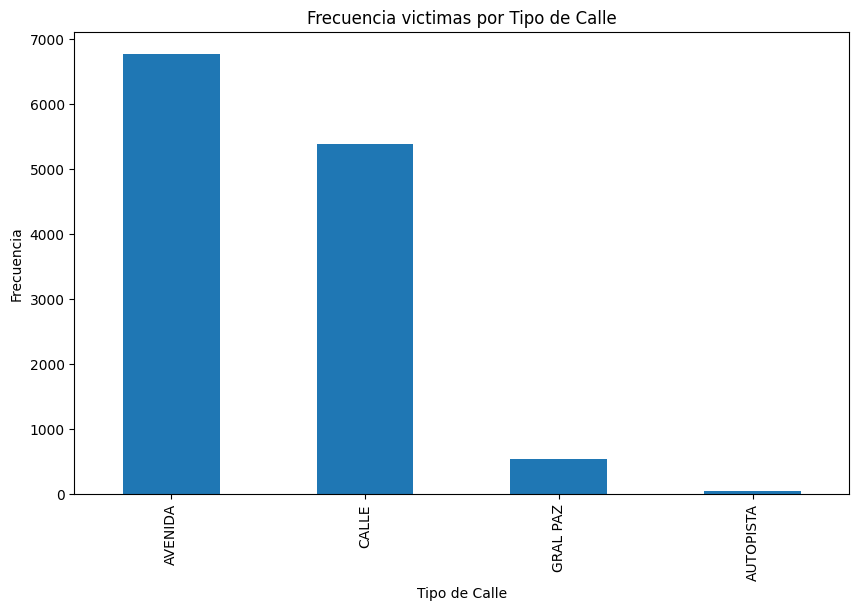

In [25]:
hechos_filtrados = hechos[hechos['tipo_calle'] != 'SD']

# Calcular la frecuencia de cada valor en 'tipo_calle'
frecuencias = hechos_filtrados['tipo_calle'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
frecuencias.plot(kind='bar')

# Agregar etiquetas y título
plt.xlabel('Tipo de Calle')
plt.ylabel('Frecuencia')
plt.title('Frecuencia victimas por Tipo de Calle')

# Mostrar el gráfico
plt.show()

##### Fácilmente se puede observar que los tipos de calle en donde es mas común los accidentes, son en las avenidas y calles, donde la 'GRAL PAZ' tambien se atribuye a una avenida de acuerdo al diccionario de palabras

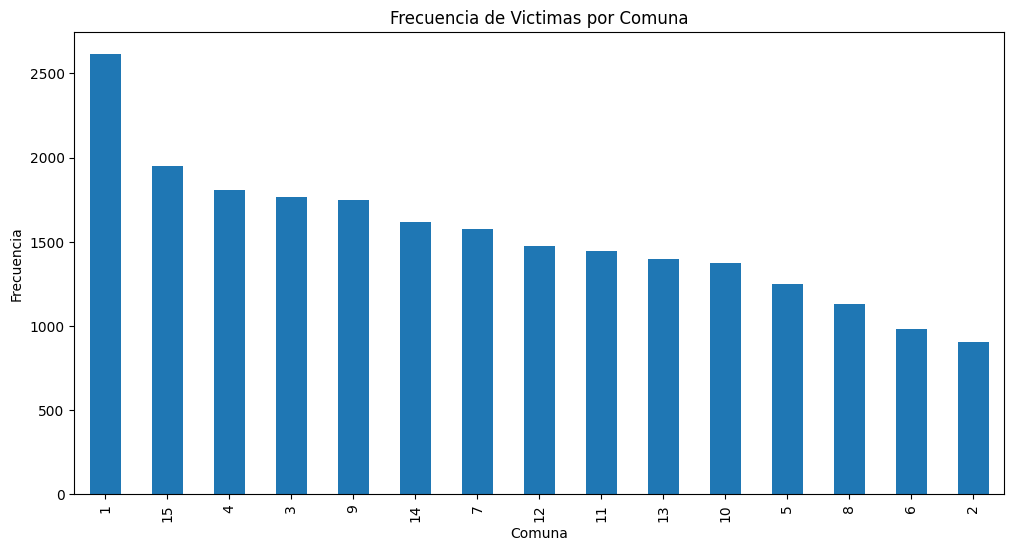

In [28]:
hechos_filtrados = hechos[~hechos['comuna'].isin(['SD', 'No Especificada', '0'])]

# Calcular la frecuencia de cada valor en 'comuna'
frecuencias = hechos_filtrados['comuna'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
frecuencias.plot(kind='bar')

# Agregar etiquetas y título
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Victimas por Comuna')

# Mostrar el gráfico
plt.show()

##### Se observa la distribución que tiene la variable comuna con respecto a la cantidad de victimas involucradas en accidentes, allí es posible ver que encontramos un patrón lineal entre las comunas